In [12]:
import json
import re
from pathlib import Path

import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import seaborn as sns

from tqdm import tqdm
from sklearn.model_selection import train_test_split
pd.set_option('display.max_colwidth', 300)
np.random.seed(24)

from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')
nltk.download('stopwords')

from nltk.corpus import stopwords

# Init Lemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/marykorol/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/marykorol/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/marykorol/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/marykorol/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
dataset_dir = Path("./dataset/")
films_list = []

for film_path in tqdm(dataset_dir.glob("./*/*/info.json")):
    with open(film_path) as f:
        films_list.append(json.load(f))

print(len(films_list))

11902it [00:03, 3399.74it/s]

11902


In [3]:
df = pd.DataFrame.from_records(films_list)[["title_id", "genre", "name", "description"]]

print(df.shape)
df.head()

(11902, 4)


,title_id,genre,name,description
0,tt0103893,horror,Buffy the Vampire Slayer,Flighty teenage girl Buffy Summers learns that she is her generation's destined battler of vampires.
1,tt2510894,horror,Hotel Transylvania 2,"Dracula and his friends try to bring out the monster in his half human, half vampire grandson in order to keep Mavis from leaving the hotel."
2,tt12026722,horror,My Special Boy,"There is no denying that Camp Crystal Lake has a dark history, one that Sean Orton is intent on ignoring. Despite being warned against returning to his childhood Camp, Sean's desire to save his family name proves to be even stronger. Sean rechristens the grounds as Camp Trinity Pointe, and with ..."
3,tt0083767,horror,Creepshow,An anthology which tells five terrifying tales inspired by the E.C. horror comic books of the 1950s.
4,tt0251736,horror,House of 1000 Corpses,Two young couples traveling across the backwoods of Texas searching for urban legends of murder end up as prisoners of a bizarre and sadistic backwater family of serial killers.


In [4]:
df.groupby('genre').count()

,title_id,name,description
genre,,,
action,499,499,499
adventure,499,499,499
animation,492,492,492
biography,495,495,495
comedy,497,497,497
crime,497,497,497
documentary,497,497,497
drama,499,499,499
family,499,499,499


In [5]:
df = df.groupby("title_id", as_index=False).agg(genres=("genre", lambda x: list(set(x))), name=("name", "first"), description=("description", "first"))
df.head(5)

,title_id,genres,name,description
0,tt0000417,[short film],Le voyage dans la lune,A group of astronomers go on an expedition to the Moon.
1,tt0000439,[short film],The Great Train Robbery,"A group of bandits stage a brazen train hold-up, only to find a determined posse hot on their heels."
2,tt0004972,"[history, war]",The Birth of a Nation,"The Stoneman family finds its friendship with the Camerons affected by the Civil War, both fighting in opposite armies. The development of the war in their lives plays through to Lincoln's assassination and the birth of the Ku Klux Klan."
3,tt0010323,[mystery],Das Cabinet des Dr. Caligari,"Hypnotist Dr. Caligari uses a somnambulist, Cesare, to commit murders."
4,tt0013257,[documentary],Haxan,"Fictionalized documentary showing the evolution of witchcraft, from its pagan roots to its confusion with hysteria in Eastern Europe."


In [6]:
# an empty list
genres = [] 

# extract genres
for i in df['genres']: 
    genres.append(i) 

# get all genre tags in a list 
all_genres = sum(genres,[]) 
len(set(all_genres))

24

# Texts Cleaning

In [13]:
# function for text cleaning 
def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

# Init Lemmatizer
lemmatizer = WordNetLemmatizer()

def dict_lemmas(text):
    pos_options = ['n', 'v', 'a', 'r', 's']
    result = [lemmatizer.lemmatize(token[0], token[1][0].lower()) if token[1][0].lower() in pos_options else lemmatizer.lemmatize(token[0]) for token in nltk.pos_tag(text.split())]
    return ' '.join(result)

stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)


In [14]:
df['clean_plot'] = df['description'].apply(lambda x: clean_text(x))
df['clean_plot'] = df['clean_plot'].apply(lambda x: dict_lemmas(x.lower()))
df['clean_plot'] = df['clean_plot'].apply(lambda x: remove_stopwords(x))

df.head()

,title_id,genres,name,description,clean_plot
0,tt0000417,[short film],Le voyage dans la lune,A group of astronomers go on an expedition to the Moon.,group astronomer go expedition moon
1,tt0000439,[short film],The Great Train Robbery,"A group of bandits stage a brazen train hold-up, only to find a determined posse hot on their heels.",group bandit stage brazen train hold find determined posse hot heel
2,tt0004972,"[history, war]",The Birth of a Nation,"The Stoneman family finds its friendship with the Camerons affected by the Civil War, both fighting in opposite armies. The development of the war in their lives plays through to Lincoln's assassination and the birth of the Ku Klux Klan.",stoneman family find friendship camerons affect civil war fight opposite army development war life play lincolns assassination birth ku klux klan
3,tt0010323,[mystery],Das Cabinet des Dr. Caligari,"Hypnotist Dr. Caligari uses a somnambulist, Cesare, to commit murders.",hypnotist dr caligari use somnambulist cesare commit murder
4,tt0013257,[documentary],Haxan,"Fictionalized documentary showing the evolution of witchcraft, from its pagan roots to its confusion with hysteria in Eastern Europe.",fictionalize documentary show evolution witchcraft pagan root confusion hysteria eastern europe


In [15]:
# Making Vocabulary 

vocab = set()
all_words = ' '.join([text for text in df['clean_plot']]) 
all_words = all_words.split() 
for word in all_words:
    vocab.add(word)

voc_len = len(vocab)
voc_len

15090

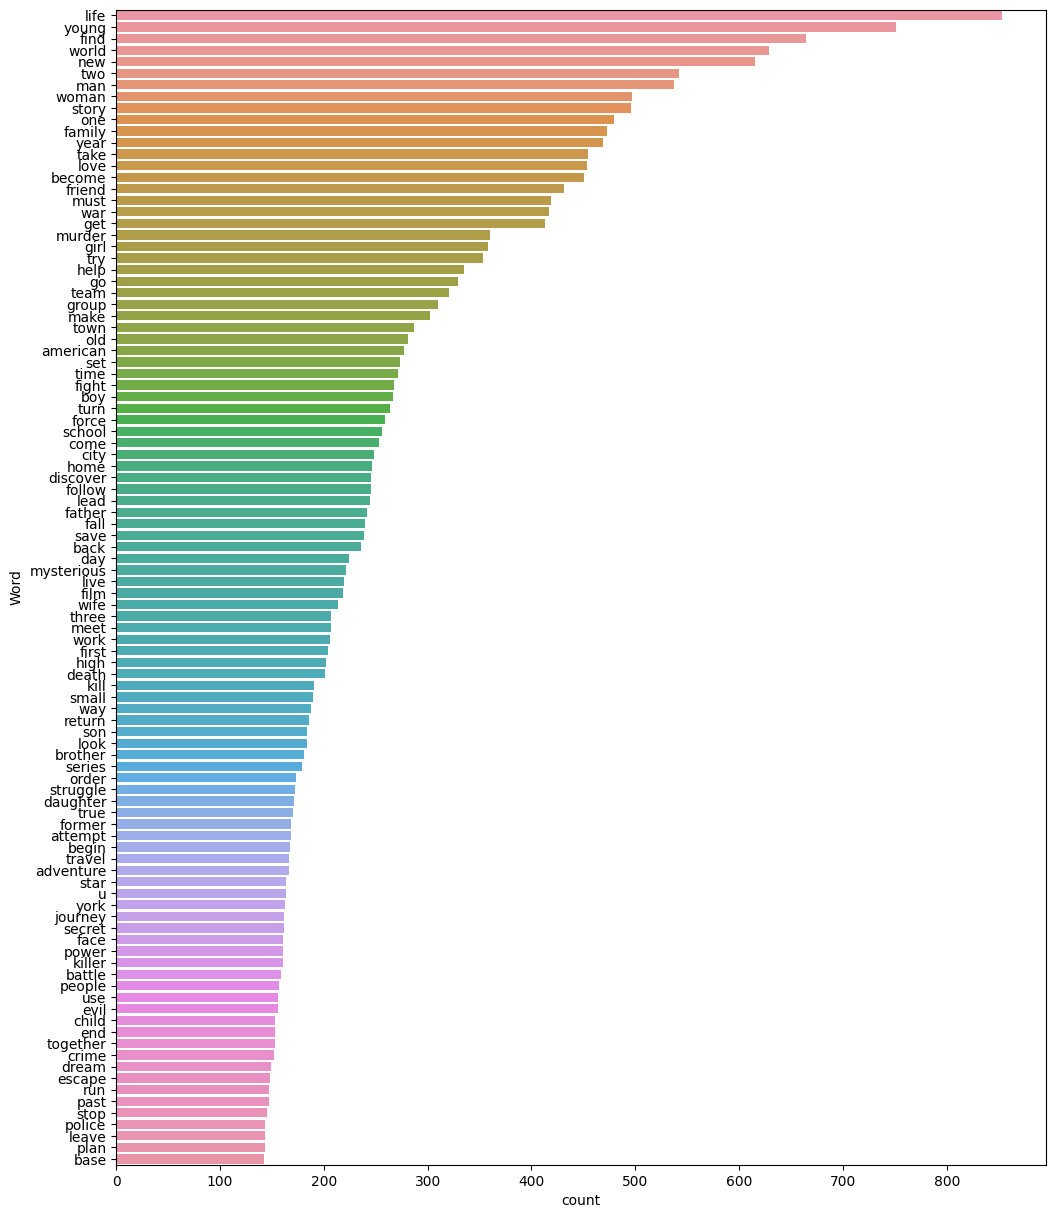

In [16]:
def freq_words(x, terms = 30): 
    all_words = ' '.join([text for text in x]) 
    all_words = all_words.split() 
    fdist = nltk.FreqDist(all_words) 
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # selecting top 20 most frequent words 
    d = words_df.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
    plt.figure(figsize=(12,15)) 
    ax = sns.barplot(data=d, x= "count", y = "word") 
    ax.set(ylabel = 'Word') 
    plt.show()
  

    # print 100 most frequent words 
freq_words(df['clean_plot'], 100)

# Preprocessing Images

In [17]:
images_paths = []
for t in df.title_id.values:
    genre = df[df.title_id == t].genres.values[0][0]
    path = "./dataset/{}/{}/poster.jpg".format(genre, t)
    images_paths.append(path)

df['image_path'] = images_paths

df.head()

,title_id,genres,name,description,clean_plot,image_path
0,tt0000417,[short film],Le voyage dans la lune,A group of astronomers go on an expedition to the Moon.,group astronomer go expedition moon,./dataset/short film/tt0000417/poster.jpg
1,tt0000439,[short film],The Great Train Robbery,"A group of bandits stage a brazen train hold-up, only to find a determined posse hot on their heels.",group bandit stage brazen train hold find determined posse hot heel,./dataset/short film/tt0000439/poster.jpg
2,tt0004972,"[history, war]",The Birth of a Nation,"The Stoneman family finds its friendship with the Camerons affected by the Civil War, both fighting in opposite armies. The development of the war in their lives plays through to Lincoln's assassination and the birth of the Ku Klux Klan.",stoneman family find friendship camerons affect civil war fight opposite army development war life play lincolns assassination birth ku klux klan,./dataset/history/tt0004972/poster.jpg
3,tt0010323,[mystery],Das Cabinet des Dr. Caligari,"Hypnotist Dr. Caligari uses a somnambulist, Cesare, to commit murders.",hypnotist dr caligari use somnambulist cesare commit murder,./dataset/mystery/tt0010323/poster.jpg
4,tt0013257,[documentary],Haxan,"Fictionalized documentary showing the evolution of witchcraft, from its pagan roots to its confusion with hysteria in Eastern Europe.",fictionalize documentary show evolution witchcraft pagan root confusion hysteria eastern europe,./dataset/documentary/tt0013257/poster.jpg


In [ ]:
import cv2

def resize_img(path):
  try:
    img = cv2.imread(path)
    img = cv2.resize(img, (40, 65)) #75, 115
    img = img.astype(np.float32)/255
    return img
  except Exception as e:
    print(str(e))
    return None

In [ ]:
# split
indices = list(range(len(df)))

train, test, idx_train, idx_test = train_test_split(df, indices, test_size=0.2)
train, val, idx_train, idx_val = train_test_split(train, idx_train, test_size=0.1)

In [ ]:
train_imgs = []
i = 0
for index, row in train.iterrows():
    if i % 100 == 0:
        print('Processing i:', i, str(row['image_path']))
    img = resize_img(str(row['image_path']))
    if img is not None:
        train_imgs.append(img)
    else:
        train = train.drop(index)
    i += 1

assert len(train) == len(train_imgs)

train_np_imgs = np.array(train_imgs)
train_np_imgs.shape

# for p in df.image_path.values:
#     pic = resize_img(p)
#     X_img_train.append(pic)

In [ ]:
val_imgs = []
i = 0
for index, row in val.iterrows():
  if i%100 == 0:
    print("Processing i:", i, str(row['image_path']))
  img = resize_img(str(row['image_path']))
  if img is not None:
    val_imgs.append(img)
  else:
    val = val.drop(index)
    print("Dropping row:", index, "Length:", len(val))
  i += 1

assert len(val) == len(val_imgs)

val_np_imgs = np.array(val_imgs)
val_np_imgs.shape

In [ ]:
test_imgs = []
i = 0
for index, row in test.iterrows():
  if i%100 == 0:
    print("Processing i:", i, str(row['image_path']))
  img = resize_img(str(row['image_path']))
  if img is not None:
    test_imgs.append(img)
  else:
    test = test.drop(index)
    print("Dropping row:", index, "Length:", len(test))
  i += 1

assert len(test) == len(test_imgs)

test_np_imgs = np.array(test_imgs)
test_np_imgs.shape

In [18]:
# df.to_csv('./joint_dataset.csv')

df.to_pickle('joint_dataset.pkl')